In [2]:
import zipfile, urllib.request, shutil
import pandas as pd
import numpy as np
import glob
import citipy
import csv
import os
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
search = SearchEngine()
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import datetime

In [3]:
#id the folder that has all the zip files
#create a glob for the path and file names
#create a empty list for holding everything 
path = r'C:\Users\14083\ProjectONE10Jan\Proj1_Files_So_Can_Reclone\RawData'

#r'C:\Users\Gogster\Documents\GitHub\RawData'

allfiles=glob.glob(path+"/*.zip")

data_list=[]

In [4]:
#loop through the folder with all the zip files
#append to the dataframe merging all the months

for z_file in allfiles:
    df=pd.read_csv(z_file, compression='zip',header=0,sep=',',quotechar='"')
    data_list.append(df)

all_frame=pd.concat(data_list,axis=0,ignore_index=True)    

In [5]:
all_frame.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [6]:
all_frame.shape
#this is all the rows 1.863721M by 16

(1863721, 16)

In [7]:
#create 2 new rows 1 for the zip code and one for the city name
#city 
all_frame.insert(loc=7, column='city', value='abc')
#zip codes
all_frame.insert(loc=8, column='zip_code', value='123456')
#age in years of users
all_frame.insert(loc=16, column='age', value ='99')

In [8]:
#display new table
all_frame.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,city,zip_code,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,abc,123456,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,99,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,abc,123456,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,99,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,abc,123456,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,99,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,abc,123456,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,99,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,abc,123456,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,99,Male,No


In [9]:
#remove rows which have Nan values
drop_frame= all_frame.dropna(axis=0,how='any',inplace=False)
#delete extra columns in the data that are not relavent
drop_frame.drop(['bike_share_for_all_trip'],axis = 1, inplace = True)
#display the dataframe
drop_frame.head()

C:\Users\14083\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,city,zip_code,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,abc,123456,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,99,Male
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,abc,123456,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,99,Male
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,abc,123456,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,99,Male
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,abc,123456,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,99,Male
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,abc,123456,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,99,Male


In [10]:
drop_frame.shape
# 1.741556 M and 18

(1741556, 18)

In [11]:
clean_df=pd.DataFrame(drop_frame)

In [12]:
#find age of user by subtracting birth year from current year
thisyear=2019
clean_df['age'] = thisyear - clean_df['member_birth_year']
clean_df['age'] = clean_df['age'].astype(int)
clean_df['member_birth_year'] = clean_df['member_birth_year'].astype(int)
clean_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,city,zip_code,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,abc,123456,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,33,Male
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,abc,123456,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,23,Male
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,abc,123456,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,28,Male
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,abc,123456,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,31,Male
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,abc,123456,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,39,Male


In [13]:
max_age = 65
# under65_df = drop_frame.loc[:, (drop_frame.isnull().sum(axis=0) <= max_age)]
# under65_df.shape
#did not work


#Use this DF for all work- It holds all the users aged 19 to 65
max_age_df = (clean_df[clean_df['age']<(max_age)])
max_age_df.shape
#1.71882M records

(1718882, 18)

In [14]:
clean_df=pd.DataFrame(max_age_df)
clean_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,city,zip_code,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,abc,123456,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,33,Male
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,abc,123456,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,23,Male
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,abc,123456,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,28,Male
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,abc,123456,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,31,Male
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,abc,123456,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,39,Male


In [15]:
#clean_df.to_csv("clean_bike_data.csv")

In [16]:
#which users are consumers vs subscribers (user_type=Subscriber)
s_grp_cnt= clean_df.groupby('user_type').size()
print (s_grp_cnt)
# 1.718882M and 18 col

user_type
Customer       197916
Subscriber    1520966
dtype: int64


In [17]:
#group by the sex of the users
# the cnt is correct here
m_grp_cnt= clean_df.groupby('member_gender').size()
print (m_grp_cnt)

member_gender
Female     431825
Male      1260551
Other       26506
dtype: int64


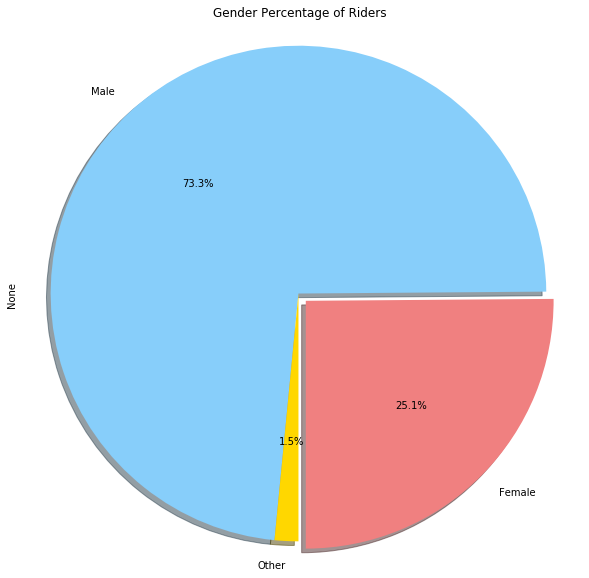

In [18]:
# insert pie graph of gender percentages
plt.title("Gender Percentage of Riders")
c_type=['Female','Male','Other']
# c_perc=[urb_fare_per,rur_fare_per,sub_fare_per]
colors = ["lightcoral","lightskyblue","gold"]
explode = (0.05, 0.0, 0) 
plot = m_grp_cnt.plot.pie(y='member_gender',figsize=(10,10),explode=explode, labels=c_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270,radius=1.2)
plt.axis("equal") 
plt.show()

In [19]:
# drop_frame.query(float('member_birth_year') > float('1989.0') and user_type == 'Subsciber').groupby('Sex').count()
#calc the number of customers and subscribers by gender

cus_df = clean_df.groupby(['user_type','member_gender']).size()
# cus_df.head(10)
cus_df


user_type   member_gender
Customer    Female             62858
            Male              131089
            Other               3969
Subscriber  Female            368967
            Male             1129462
            Other              22537
dtype: int64

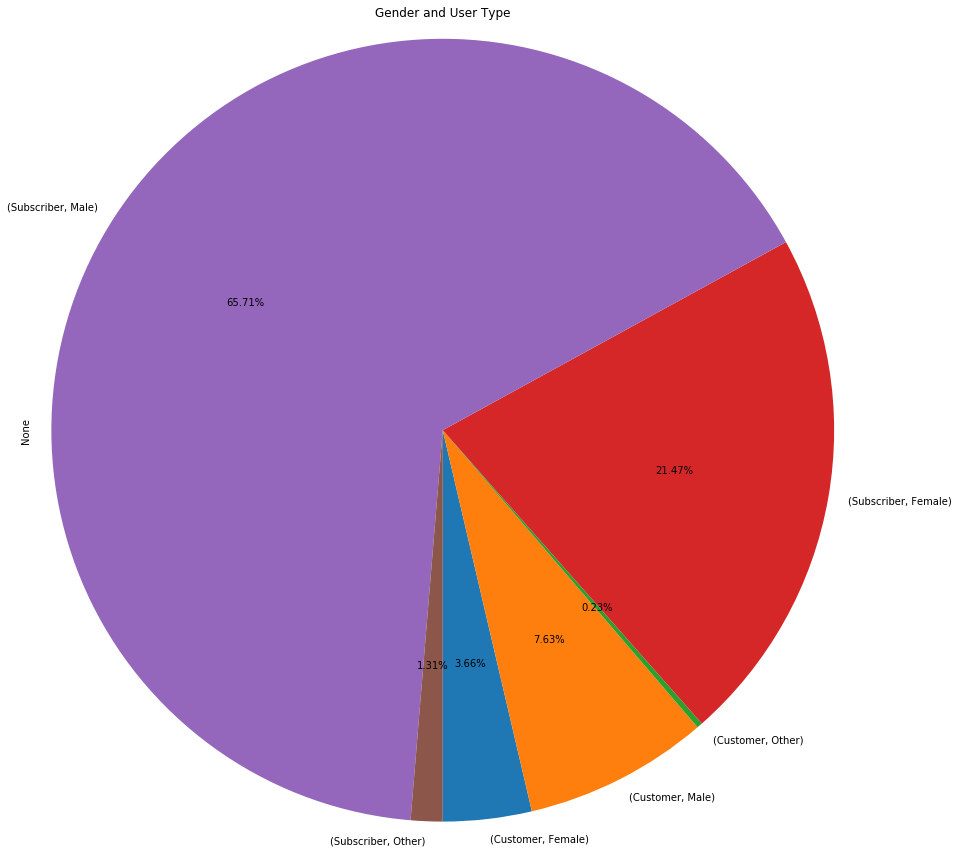

In [20]:
explode = (0.05, 0.0, .05,1.0,1.0,100.0)
plot = cus_df.plot.pie(y='member_gender',figsize=(15,15),autopct="%1.2f%%", shadow=False, labeldistance=1.05,startangle=270,radius=1.2)
plt.title("Gender and User Type")
# plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()

In [21]:
#bin the data by age groups
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 22, 31, 38, 45, 55, 66, 100]

# Create the names for the four bins
group_names = ["<21", "Early Millenial", "Late Millenial", "38-45", "46-55","56-65", ">65"]

In [40]:
# clean_df['age_grp'] = pd.cut(clean_df["age"], bins, labels=group_names)
# # age_df["age_bracket"]= pd.cut(clean_df["age"], bins, labels=group_names)
# #age_df= age_df.groupby([user_type])
# clean_df.head()
# clean_df.shape

clean_df['age_grp'] = pd.cut(clean_df["age"], bins, labels=group_names)
# age_df["age_bracket"]= pd.cut(clean_df["age"], bins, labels=group_names)
clean_age_df= clean_df.groupby(['age_grp','user_type'])['age_grp'].count()

In [41]:
clean_age_df=clean_df.groupby('user_type', as_index=False)['age_grp'].count()
#print(clean_age_df)
clean_age_df=pd.DataFrame(clean_age_df)
clean_age_df.head()

,user_type,age_grp
0,Customer,197916
1,Subscriber,1520966


In [42]:
clean_age_df.shape

(2, 2)

In [43]:
# ORIGINAL CODE
# #number of users by the age grps and make them stackin

# #df2 = df.groupby(['Name', 'Abuse/NFF'])['Name'].count().unstack('Abuse/NFF').fillna(0)
# clean_age_df[['user-type','age_grp']].plot(kind='bar', stacked=True)
#plot = clean_age_df.plot.pie(y='age_grp',figsize=(5,5))
#plot=clean_age_df.plot.bar(['user-type'] stacked=True)
     #clean_age_df.plot(kind='bar',stacked=True) #works but lists it all out
#does not work pivot_df= clean_age_df.df.pitot(index= 'age_grp', columns = 'user_type', values='user_type' )
# plot_frame=clean_df.convert_objects(convert_numeric=True)
#pd.crosstab(clean_age_df.user_type,clean_age_df.age_grp).plot.barh(stacked=False)
# plot=clean_age_df.groupby(['age_grp','user_type'])['age_grp'].count().unstack('user_type').fillna(0)
# plot[['age_grp','user_type']].plot(kind='bar', stacked= False)
     #ax=clean_age_df[['age_grp','user_type']].plot(kind='bar',title='TITLE',figsize=(10,10),fontsize=12)
     #ax.set_xlabel=
     #plt.xticks(rotation=30)
     #plt.legend(fontsize=18)
     #plt.show()

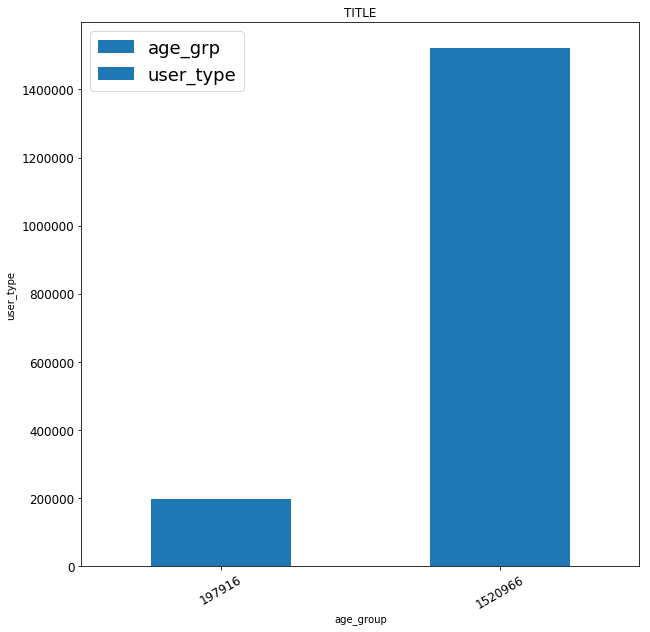

In [44]:
# #number of users by the age grps and make them stackin

# #df2 = df.groupby(['Name', 'Abuse/NFF'])['Name'].count().unstack('Abuse/NFF').fillna(0)
# clean_age_df[['user-type','age_grp']].plot(kind='bar', stacked=True)
#plot = clean_age_df.plot.pie(y='age_grp',figsize=(5,5))
#plot=clean_age_df.plot.bar(['user-type'] stacked=True)
clean_age_df.plot(kind='bar',stacked=True) #works but lists it all out
#does not work pivot_df= clean_age_df.df.pitot(index= 'age_grp', columns = 'user_type', values='user_type' )
# plot_frame=clean_df.convert_objects(convert_numeric=True)
#pd.crosstab(clean_age_df.user_type,clean_age_df.age_grp).plot.barh(stacked=False)
# plot=clean_age_df.groupby(['age_grp','user_type'])['age_grp'].count().unstack('user_type').fillna(0)
# plot[['age_grp','user_type']].plot(kind='bar', stacked= False)
#ax=clean_age_df[['age_grp','user_type']].plot(kind='bar',title='TITLE',figsize=(10,10),fontsize=12)
ax=clean_age_df.groupby('age_grp')['user_type'].count()
ax=ax.plot(kind='bar',title='TITLE',figsize=(10,10),fontsize=12)
ax.set_xlabel('age_group')
ax.set_ylabel('user_type')
plt.xticks(rotation=30)
plt.legend(fontsize=18)
plt.show()



#i don't think i have enough time to finish this - jason

In [37]:
clean_df['age'].describe()

count    1.718882e+06
mean     3.546116e+01
std      9.556261e+00
min      1.900000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.100000e+01
max      6.400000e+01
Name: age, dtype: float64

In [45]:
#clean_small= clean_df.head(1000)
#clean_small.shape
#clean_small
#len(clean_df)

In [48]:
# Print out one element to determine the location of zipcode
coordinates = search.by_coordinates(lat=lat, lng=lng, radius=100, returns=1)
coordinates

[SimpleZipcode(zipcode='94104', zipcode_type='Standard', major_city='San Francisco', post_office_city='San Francisco, CA', common_city_list=['San Francisco'], county='San Francisco County', state='CA', lat=37.791, lng=-122.402, timezone='Pacific', radius_in_miles=0.2840909090909091, area_code_list=['415', '510', '650'], population=406, population_density=5232.0, land_area_in_sqmi=0.08, water_area_in_sqmi=0.0, housing_units=368, occupied_housing_units=207, median_home_value=1000001, median_household_income=48750, bounds_west=-122.404613, bounds_east=-122.399149, bounds_north=37.793987, bounds_south=37.787642)]

In [49]:
# Create an empty list to append the coordinate values to
coordinates_list = []

# Zip the columns "start_station_latitude" and "start_station_longitude" to return an iterator of tuples
# Loop through each value in the columns using lat, lng
for lat, lng  in zip(clean_small['start_station_latitude'], clean_small['start_station_longitude']):
    print(lat, lng)
    # Find the lng, lat paired coordinates using search.by_coordinates() from the uszipcode dependency
    # Set returns to 0 to return all of the coordinates in the lat,lng columns
    # Set the radius to 100 to make sure to cover all of the zipcodes included in our database
    coordinates = search.by_coordinates(lat=lat, lng=lng, radius=100, returns=20)
    # Append the lat,lng coordinates to coordinates_list
    coordinates_list.append(coordinates)

37.7614205 -122.4264353
37.348758686744794 -121.89479783177376
37.77643481920474 -122.42624402046205
37.7637085 -122.41520420000002
37.77588 -122.39317
37.7524278 -122.42062779999999
37.342725 -121.89561699999999
37.76921786152374 -122.40764558315277
37.764765215497704 -122.42009103298186
37.336802 -121.89409009999999
37.8045623549303 -122.27173805236816
37.765052000000004 -122.42186609999999
37.776639200000005 -122.3955263
37.7753058 -122.39738
37.329732 -121.90178200000001
37.8524766 -122.2702132
37.8688126 -122.25876399999999
37.7610471 -122.43264170000002
37.82840997305853 -122.26631462574005
37.7605936 -122.41481709999998
37.78352083526095 -122.43115782737732
37.8688126 -122.25876399999999
37.8007544 -122.2748943
37.747998100000004 -122.42021869999999
37.795392 -122.394203
37.7644783 -122.40257009999999
37.776598 -122.39528200000001
37.7670373 -122.41544250000001
37.78352083526095 -122.43115782737732
37.809012599999996 -122.2682473
37.770407399999996 -122.39119840000002
37.7810737

37.78499972833808 -122.39593561749642
37.82628629999999 -122.2651002
37.747998100000004 -122.42021869999999
37.7567083 -122.421025
37.8618037 -122.25356869999999
37.81231409135146 -122.26077854633331
37.7787677 -122.41592920000001
37.7567083 -122.421025
37.795392937254526 -122.4047702550888
37.330165 -121.88583100000001
37.78389935708493 -122.40844488143921
37.7896254 -122.400811
37.791464000000005 -122.391034
37.7880593 -122.39186480000001
37.7816495 -122.4154077
37.8359455 -122.2623663
37.764555 -122.41034499999999
37.82840997305853 -122.26631462574005
37.776753899999996 -122.3990176
37.8087021 -122.26992709999999
37.776598 -122.39528200000001
37.330698 -121.888979
37.8087021 -122.26992709999999
37.7824046019341 -122.43944585323335
37.8693603 -122.25433740000001
37.84427875399067 -122.251900434494
37.809012599999996 -122.2682473
37.7752321 -122.22449820000001
37.7807601 -122.39498940000001
37.8524766 -122.2702132
37.78389935708493 -122.40844488143921
37.8524766 -122.2702132
37.783899

37.76921786152374 -122.40764558315277
37.76930529999999 -122.4268256
37.773506899999994 -122.4160402
37.7633158 -122.4219039
37.809012599999996 -122.2682473
37.7524278 -122.42062779999999
37.776619000000004 -122.41738500000001
37.77331087889723 -122.44429260492323
37.78752178045625 -122.39740490913393
37.7737172 -122.41164669999999
37.776639200000005 -122.3955263
37.751017100000006 -122.4119009
37.776753899999996 -122.3990176
37.8045623549303 -122.27173805236816
37.805318299999996 -122.2948365
37.805318299999996 -122.2948365
37.82840997305853 -122.26631462574005
37.8113768 -122.2651925
37.7774157 -122.4418376
37.747998100000004 -122.42021869999999
37.3336577 -121.90858590000002
37.809012599999996 -122.2682473
37.770407399999996 -122.39119840000002
37.78637526861584 -122.40490436553955
37.8113768 -122.2651925
37.773491899999996 -122.40367250000001
37.78389935708493 -122.40844488143921
37.8045623549303 -122.27173805236816
37.809012599999996 -122.2682473
37.795001 -122.39997
37.7745204011

37.776619000000004 -122.41738500000001
37.776598 -122.39528200000001
37.77588 -122.39317
37.771058000000004 -122.402717
37.744066700000005 -122.42147220000001
37.82840997305853 -122.26631462574005
37.78127 -122.41873999999999
37.776639200000005 -122.3955263
37.78095459960753 -122.39974915981293
37.791464000000005 -122.391034
37.776639200000005 -122.3955263
37.776639200000005 -122.3955263
37.7644783 -122.40257009999999
37.7913 -122.399051
37.80477 -122.40323400000001
37.788975 -122.403452
37.75921029999999 -122.4213392
37.776619000000004 -122.41738500000001
37.84427875399067 -122.251900434494
37.781752000000004 -122.40512700000001
37.7567083 -122.421025
37.7753058 -122.39738
37.7662185 -122.4310597
37.771058000000004 -122.402717
37.7896254 -122.400811
37.789756 -122.39464299999999
37.776619000000004 -122.41738500000001
37.75736899005735 -122.3920565843582
37.78967670000001 -122.39042849999998
37.776639200000005 -122.3955263
37.809012599999996 -122.2682473
37.78967670000001 -122.39042849

In [50]:
# Use a list comprehension to unpack the rest of the values in "coordinates" so you can choose the zipcodes to add to the dataframe
zipcode = [coordinates_list[i][0].items()[0][1] for i, x in enumerate(coordinates_list)]
# Assign the zipcode values to the zip_code column in the dataframe
clean_small['zip_code'] = zipcode
# Preview the first 5 rows of the updated dataframe to confirm that the changes were made properly
clean_small.head()

C:\Users\14083\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,city,zip_code,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender,age_grp
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,abc,94114,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,33,Male,Late Millenial
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,abc,95112,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,23,Male,Early Millenial
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,abc,94102,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,28,Male,Early Millenial
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,abc,94110,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,31,Male,Early Millenial
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,abc,94158,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,39,Male,38-45


In [51]:
# Calculate number of cities in each zip code

# Create an empty list to append the zip_code values to
city_by_zip_list = []

# Loop through the zip_code column using enumerate to return an iterable object
for i, zipcodes in enumerate(clean_small['zip_code']):
    print(i, zipcodes)
     # Find the zip code values using search.by_zipcode() from the uszipcode dependency
    city_by_zip = search.by_zipcode(zipcode=zipcodes)
    # Append the zip code values to the city_by_zip_list
    city_by_zip_list.append(city_by_zip)
 

0 94114
1 95112
2 94102
3 94110
4 94158
5 94110
6 95113
7 94103
8 94110
9 95113
10 94612
11 94102
12 94158
13 94158
14 95113
15 94705
16 94704
17 94114
18 94609
19 94110
20 94102
21 94704
22 94612
23 94110
24 94105
25 94158
26 94158
27 94102
28 94102
29 94612
30 94158
31 94103
32 94102
33 94102
34 94607
35 94102
36 94102
37 94158
38 94110
39 94110
40 94110
41 94612
42 94104
43 94612
44 94104
45 94114
46 94607
47 94110
48 94102
49 94102
50 94103
51 94117
52 94102
53 94102
54 94104
55 94104
56 94158
57 94606
58 94110
59 94108
60 94110
61 94158
62 94108
63 94103
64 94102
65 94102
66 94102
67 94110
68 94104
69 94705
70 94103
71 94110
72 94103
73 94606
74 94609
75 94703
76 94158
77 94103
78 94618
79 94102
80 94105
81 94104
82 94108
83 94612
84 94158
85 94158
86 95113
87 94102
88 94703
89 94102
90 94610
91 94105
92 94704
93 94102
94 94117
95 94105
96 94703
97 94110
98 94103
99 94103
100 94158
101 95112
102 94610
103 94705
104 94102
105 94705
106 94104
107 94110
108 94114
109 95112
110 94704


880 94607
881 94104
882 94705
883 94105
884 94105
885 94105
886 94110
887 94110
888 94612
889 94158
890 94607
891 94609
892 95112
893 94103
894 94117
895 94105
896 94105
897 94105
898 94102
899 94612
900 94158
901 94158
902 94104
903 94117
904 94110
905 94104
906 94103
907 94704
908 94104
909 94612
910 94612
911 94104
912 94111
913 94110
914 94102
915 94158
916 94105
917 94110
918 94607
919 94612
920 94110
921 94606
922 94110
923 94105
924 94105
925 94105
926 94102
927 95113
928 94158
929 94102
930 94158
931 94612
932 95112
933 94158
934 95112
935 94103
936 94110
937 94117
938 94105
939 94110
940 94158
941 94609
942 94104
943 94606
944 94105
945 94158
946 94105
947 94105
948 94111
949 94111
950 94105
951 94104
952 94105
953 94612
954 94110
955 94105
956 94158
957 94158
958 94105
959 94104
960 94103
961 94158
962 94703
963 94703
964 94102
965 94703
966 94105
967 94104
968 94609
969 94609
970 94158
971 94105
972 94102
973 95112
974 94104
975 94102
976 94609
977 94158
978 94102
979 94612


In [55]:
# Calculate number of stations in each zip code

# Create a new dataframe with the columns zip_code, start_station_id, and end_station_id. This will be used to calculate the
# number of stations in each zip code
station_count_df = clean_df[['zip_code', 'start_station_id', 'end_station_id']]
# Display the first few rows to confirm that the dataframe was created properly
station_count_df

,zip_code,start_station_id,end_station_id
0,94114,120.0,285.0
2,95112,304.0,296.0
4,94102,74.0,19.0
6,94110,110.0,134.0
7,94158,81.0,93.0
8,94110,134.0,4.0
9,95113,305.0,317.0
11,94103,89.0,43.0
12,94110,223.0,86.0
13,95113,308.0,297.0


In [56]:
# Set a variable, unique_count, to a groupby() object to calculate the number of stations in each zip code
# Pass the zip_code column into groupby to count the number of stations grouped by each unique zip code
# Use .size() to return the total number of elements
# Use .reset_index() to recalculate the index for each row based upon their position within the new DataFrame. This will
 # enable simpler referencing of rows in the future
# Pass the name argument in .reset_index() to assign a name to the column that will hold the values for the number of stations
 # in each zip code
unique_count = station_count_df.groupby('zip_code').size().reset_index(name='num_stations_by_zip')
# Display the dataframe to make sure it was created properly
unique_count

,zip_code,num_stations_by_zip
0,123456,1717882
1,94102,94
2,94103,95
3,94104,101
4,94105,122
5,94108,11
6,94110,85
7,94111,14
8,94114,11
9,94115,4


In [57]:
# Calculate the length of the station_count_df dataframe and the sum of the values in the num_stations_by_zip to make sure they
# match
print(len(station_count_df))
print(unique_count['num_stations_by_zip'].sum())

1718882
1718882


In [58]:
#change starttime column to pandas datetime
clean_df['start_time']=pd.to_datetime(clean_df['start_time'])
#add a column for Month
clean_df['month'] = clean_df['start_time'].dt.month
#use groupby to find the number of rides per month
total_rides_month = clean_df.groupby('month').start_time.count()
total_rides_month

month
1      85165
2      96855
3     100747
4     120084
5     164959
6     179064
7     181490
8     176217
9     173049
10    189563
11    127039
12    124650
Name: start_time, dtype: int64

In [59]:
# subset the clean_df for female, male and other
female_df=clean_df.loc[clean_df['member_gender'] == 'Female']
male_df=clean_df.loc[clean_df['member_gender'] == 'Male']
other_df=clean_df.loc[clean_df['member_gender'] == 'Other']
# find the total numbers of rides  per month for each gender group
total_rides_fmonth = female_df.groupby('month').start_time.count()
total_rides_mmonth = male_df.groupby('month').start_time.count()
total_rides_omonth = other_df.groupby('month').start_time.count()

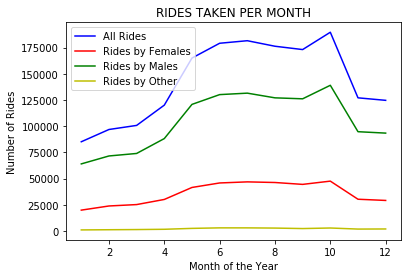

In [60]:
#plot the graph for "RIDES TAKEN PER MONTH"
plt.plot(total_rides_month,'b', label = "All Rides")
plt.plot(total_rides_fmonth,'r', label = "Rides by Females")
plt.plot(total_rides_mmonth,'g', label = "Rides by Males")
plt.plot(total_rides_omonth,'y', label = "Rides by Other")
plt.legend()
plt.title('RIDES TAKEN PER MONTH')
plt.xlabel("Month of the Year")
plt.ylabel("Number of Rides")
plt.show()